In [2]:
import nltk
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import re
from bs4 import BeautifulSoup

# from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

data = None
with open('softwareengineering.txt', 'r', encoding='UTF-8') as data_file:
    data = data_file.read()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Clean data
try:
    cleaned_data = ''
    cleaned_data_lines = data.splitlines()
    is_new_document = True
    for i, line in enumerate(cleaned_data_lines):
        if is_new_document:
            is_new_document = False
            continue
        if not line:
            is_new_document = True
            cleaned_data += '\n'
            continue
        cleaned_data += line
    soup = BeautifulSoup(cleaned_data, features='html.parser')
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split('  '))
    data = ' \n'.join(chunk for chunk in chunks if chunk)
except:
    print('Something went wrong!')


In [4]:
# Filter out words that ends with symbols as well as stop words
stop_words = nltk.corpus.stopwords.words('english')
def list_filter(x):
    blacklist = ['.', '-', ':', 'n\'t']
    for c in blacklist:
        if c in x:
            return False
    if x.lower() in stop_words:
        return False
    result = re.compile('\\w+[^1-9\\.\\-\\s]').match(x)
    if result == None:
        return False
    # return True
    if result.start() == 0:
        return True
    return False

In [5]:
def display_top_20_tokens(tokens):
    word_count_dict = {}
    for word in tokens:
        if word not in word_count_dict:
            word_count_dict[word] = 1
        else:
            word_count_dict[word] += 1
    word_count_dict = {k: v for k, v in sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True)}
    items = list(word_count_dict.items())
    print('%d unique tokens' % len(items))
    for i, item in enumerate(items[:20]):
        print(i+1, ':', item)
    return word_count_dict

In [6]:
output = list(set(nltk.word_tokenize(data)))
output.sort()
word_list = output
word_list = list(filter(list_filter, nltk.word_tokenize(data)))
word_list_dict = display_top_20_tokens(word_list)

3616 unique tokens
1 : ('code', 155)
2 : ('one', 125)
3 : ('would', 108)
4 : ('data', 95)
5 : ('use', 89)
6 : ('need', 82)
7 : ('like', 79)
8 : ('even', 69)
9 : ('make', 66)
10 : ('class', 66)
11 : ('function', 64)
12 : ('number', 59)
13 : ('also', 58)
14 : ('way', 57)
15 : ('might', 56)
16 : ('change', 55)
17 : ('programming', 55)
18 : ('example', 54)
19 : ('object', 53)
20 : ('know', 50)


In [7]:
# TBC (Stemming)
stemmer = nltk.stem.snowball.SnowballStemmer('english')
stem = []
for word in word_list:
    stem.append(stemmer.stem(word))
stem_dict = display_top_20_tokens(stem)


2325 unique tokens
1 : ('use', 212)
2 : ('code', 169)
3 : ('one', 135)
4 : ('need', 134)
5 : ('program', 120)
6 : ('make', 113)
7 : ('chang', 109)
8 : ('would', 109)
9 : ('function', 109)
10 : ('object', 104)
11 : ('data', 96)
12 : ('languag', 91)
13 : ('class', 91)
14 : ('like', 89)
15 : ('messag', 77)
16 : ('number', 76)
17 : ('even', 75)
18 : ('call', 74)
19 : ('thing', 74)
20 : ('test', 71)


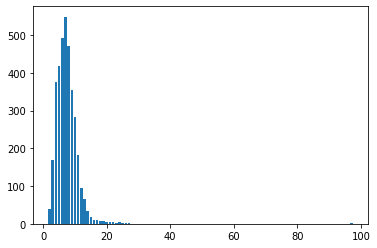

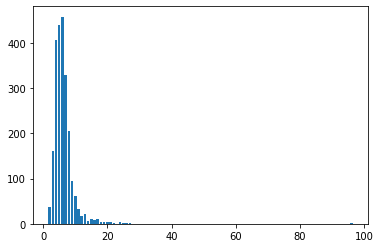

In [8]:
for m_dict in [word_list_dict, stem_dict]:
    count_dict = {}
    for token in m_dict.keys():
        token_len = len(token)
        if token_len not in count_dict:
            count_dict[token_len] = 1
        else:
            count_dict[token_len] += 1
    # Plot x and y
    x = count_dict.keys()
    y = list(count_dict.values())
    plt.figure()
    plt.bar(x, y)
    # print (count_dict)

In [9]:
# Sentence Segmentation
sentences = nltk.sent_tokenize(data)
distribution = {
    'sentence_length': [],
    'num_sentences': []
}
for sentence in sentences:
    sentence_length = len(nltk.word_tokenize(sentence))
    index = None
    try:
        index = distribution['sentence_length'].index(sentence_length)
        distribution['num_sentences'][index] += 1
    except:
        distribution['sentence_length'].append(sentence_length)
        distribution['num_sentences'].append(1)        

In [10]:
distribution_tuples = []
for i in range(len(distribution['sentence_length'])):
    distribution_tuples.append((distribution['sentence_length'][i],distribution['num_sentences'][i]))
distribution_tuples.sort(key=lambda x: x[0])
# distribution_tuples

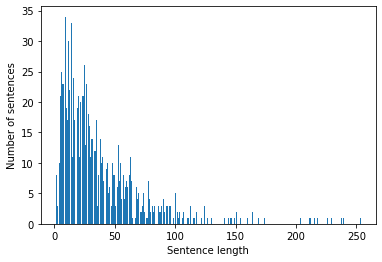

131


In [11]:
truncated_tuples = [m_tuple for m_tuple in distribution_tuples if m_tuple[1]]

# plt.figure(figsize=(16,4))
# plt.subplot(1,2,1)
# fig = plt.figure()
# plt.add_axes([0,0,1,1])
zipped = [*zip(*truncated_tuples)]
plt.bar(zipped[0],zipped[1])
plt.ylabel('Number of sentences')
plt.xlabel('Sentence length')
plt.show()

# plt.subplot(1,2,2)
# plt.figure()
# plt.plot(*zip(*truncated_tuples))
# plt.margins(0)
# plt.ylabel('Number of sentences')
# plt.xlabel('Sentence length')
# plt.ylim(ymin=1)
# plt.xlim(xmin=1)
# plt.show()

print(len(distribution_tuples))


In [12]:

# distribution_tuples
mydf = pd.DataFrame({"sentence_length":zipped[0], "no_sentences":zipped[1]})
mydf.describe()

,sentence_length,no_sentences
count,131.000000,131.000000
mean,79.038168,7.534351
std,59.188279,7.849839
min,2.000000,1.000000
25%,34.500000,1.500000
50%,67.000000,4.000000
75%,106.500000,11.000000
max,253.000000,34.000000


In [13]:
# POS Tagging
selected_sentences = random.sample(sentences, 3)
for sentence in selected_sentences:
    print(sentence)
    print(nltk.pos_tag(nltk.word_tokenize(sentence)))
    print()
    print()

If the signature does not change, the compiler will not find this issue, only the unit tests.Approaching this from a different angle, there's a simple process to ensure that the tests continue passing after merging both branches: a branch must pass CI after being applied to the current target branch before being merged.
[('If', 'IN'), ('the', 'DT'), ('signature', 'NN'), ('does', 'VBZ'), ('not', 'RB'), ('change', 'VB'), (',', ','), ('the', 'DT'), ('compiler', 'NN'), ('will', 'MD'), ('not', 'RB'), ('find', 'VB'), ('this', 'DT'), ('issue', 'NN'), (',', ','), ('only', 'RB'), ('the', 'DT'), ('unit', 'NN'), ('tests.Approaching', 'VBG'), ('this', 'DT'), ('from', 'IN'), ('a', 'DT'), ('different', 'JJ'), ('angle', 'NN'), (',', ','), ('there', 'EX'), ("'s", 'VBZ'), ('a', 'DT'), ('simple', 'JJ'), ('process', 'NN'), ('to', 'TO'), ('ensure', 'VB'), ('that', 'IN'), ('the', 'DT'), ('tests', 'NNS'), ('continue', 'VBP'), ('passing', 'VBG'), ('after', 'IN'), ('merging', 'VBG'), ('both', 'DT'), ('branche